In [1]:
import cv2
import imutils
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("./resources/10.png")

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

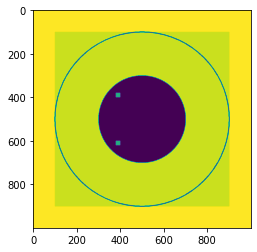

In [4]:
plt.subplot(1,1,1)
plt.imshow(img_gray)
plt.show()

In [5]:
## Using detectMultiScale() function
## Will explore this approach later. Requires training a classifier to detect certain shapes

#### ATTEMPT 1

##### Using countours for object detection: Ref https://www.pyimagesearch.com/2016/02/08/opencv-shape-detection/

##### Note: Unsuccessful attempt in detecting square shapes. Might need to revisit later

In [7]:
blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

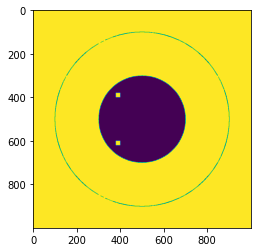

In [8]:
plt.imshow(thresh)

In [9]:
cnts = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [10]:
cnts = imutils.grab_contours(cnts)

In [11]:
def detect(c):
    # initialize the shape name and approximate the contour
    shape = "unidentified"
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)
    
    # if the shape is a triangle, it will have 3 vertices
    if len(approx) == 3:
        shape = "triangle"
    # if the shape has 4 vertices, it is either a square or
    # a rectangle
    elif len(approx) == 4:
        # compute the bounding box of the contour and use the
        # bounding box to compute the aspect ratio
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        # a square will have an aspect ratio that is approximately
        # equal to one, otherwise, the shape is a rectangle
        shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
    # if the shape is a pentagon, it will have 5 vertices
    elif len(approx) == 5:
        shape = "pentagon"
    # otherwise, we assume the shape is a circle
    else:
        shape = "circle"
    # return the name of the shape
    return shape

In [ ]:
# loop over the contours
for c in cnts:
    break
    # compute the center of the contour, then detect the name of the
    # shape using only the contour
    M = cv2.moments(c)
    cX = int((M["m10"] / M["m00"]))
    cY = int((M["m01"] / M["m00"]))
    shape = detect(c)
    # multiply the contour (x, y)-coordinates by the resize ratio,
    # then draw the contours and the name of the shape on the image
    c = c.astype("float")
    c = c.astype("int")
    cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
    cv2.putText(img, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
    0.5, (255, 255, 255), 2)
    # show the output image
    cv2.imshow("Image", img)
    cv2.waitKey(0)

#### ATTEMPT 2: 

#### Object Detection and Object Tracking using HSV color space

In [4]:
def nothing(x):
    pass

In [3]:
# while True:
frame = cv2.imread('resources/10.png')

hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#     hsv(140,100,100)
l_g = np.array([50, 0, 0])
u_g = np.array([255, 255,255])

#     l_h = cv2.getTrackbarPos("LH", "Tracking")
#     l_s = cv2.getTrackbarPos("LS", "Tracking")
#     l_v = cv2.getTrackbarPos("LV", "Tracking")

#     u_h = cv2.getTrackbarPos("UH", "Tracking")
#     u_s = cv2.getTrackbarPos("US", "Tracking")
#     u_v = cv2.getTrackbarPos("UV", "Tracking")

# l_g = np.array([l_h, l_s, l_v])
# u_g = np.array([u_h, u_s, u_v])

print(l_g)


mask = cv2.inRange(hsv, l_g, u_g)
# mask = cv2.imread('resources/10.png',-1)

res = cv2.bitwise_and(frame, frame, mask=mask)

cv2.imshow("frame", frame)
cv2.imshow("mask", mask)
cv2.imshow("res", res)

key = cv2.waitKey(1)

# if key == 27:
#     break
    
cv2.destroyAllWindows()

[50  0  0]


### Attempt 3

##### Ref: http://www.learningaboutelectronics.com/Articles/How-to-find-the-x-and-y-coordinates-of-an-object-in-an-image-Python-OpenCV.php

In [4]:
import cv2
import matplotlib.pyplot as plt

In [5]:
image = cv2.imread('resources/10.png')

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [33]:
edges = cv2.Canny(gray, 10, 10)

In [34]:
len(edges)

1000

In [35]:
contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [36]:
sorted_contours = sorted(contours, key= cv2.contourArea, reverse=False)

In [40]:
smallest_item = sorted_contours[0]

In [39]:
smallest_item_2 = sorted_contours[1]

In [41]:
M = cv2.moments(smallest_item)

In [42]:
x,y,w,h = cv2.boundingRect(smallest_item)

In [44]:
x1 = x
x2 = x + w
# xcoordinate_center = int(M['m10']/M['m00'])

In [46]:
y1 = y
x2 = y + h
# ycoordinate_center = int(M['m10']/M['m00'])

In [47]:
print ("Box 1")

print("x coordinate 1: ", str(x1))

print("x coordinate 2: ", str(x2))

print("x center coordinate ", str(xcoordinate_center))

print ("")

Smaller Box
x coordinate 1:  99
x coordinate 2:  901
x center coordinate  499



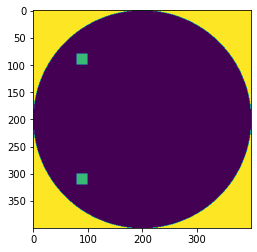

(400, 400)


In [121]:
plt.imshow(gray)
plt.show()
print(gray.shape)

In [1]:
import cv2
import matplotlib.pyplot as plt

# eg. img_path = 'resources/10.png'

def get_boxes(img_path):
    
    boxes = []

    image = cv2.imread(img_path)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    gray = gray[300:700, 300:700]
    
    (a, b) = gray.shape
    origin = (a/2, b/2)

    edges = cv2.Canny(gray, 50,200)

    contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    sorted_contours = sorted(contours, key= cv2.contourArea, reverse=False)

    print("num contours", len(contours))

    fig = plt.figure(figsize=(10, 7))

    rows = 1
    columns= len(contours)

    for idx in range(len(contours)):
        item = sorted_contours[idx]

        M = cv2.moments(item)
        x,y,w,h = cv2.boundingRect(item)

        x1 = x
        x2 = x + w
    #     xcoordinate_center = int(M['m10']/M['m00'])

        y1 = y
        y2 = y + h
    #     ycoordinate_center = int(M['m10']/M['m00'])

        roi = gray[y1:y2, x1:x2]

        ax = fig.add_subplot(rows, columns, idx + 1)
        print(f'v1: {(x1,y1)}, v2: {(x2,y2)}')
        plt.imshow(roi)
        plt.show()

        if (x2 - x1) < 25 and (y2 - y1) < 25:
            boxes.append(((x1,y1), (x2,y2)))


    print((boxes, origin))
    
    return (boxes, origin)

In [2]:
def get_quadrant_for_box(box, origin):
    (x, y) = box[0]
    (x0, y0) = origin
    
    if x < x0:
        if y < y0:
            return 0
        else: 
            return 2
    else:
        if y < y0:
            return 1
        else:
            return 3
    

In [3]:
def quadrants_for_boxes(boxes, origin):
    quadrants = []
    for box in boxes:
        quadrant = get_quadrant_for_box(box, origin)
        quadrants.append(quadrant)
    
    return quadrants

In [4]:
def get_encoding(quadrants):
    code = 0
    
    for x in quadrants:
        code = code | 1 << (3-x)
    
    return format(code, "04b")

num contours 4
v1: (220, 220), v2: (400, 400)


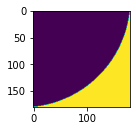

v1: (0, 0), v2: (400, 400)


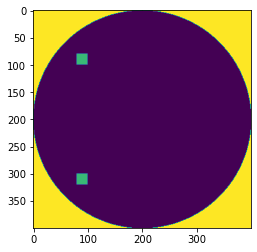

v1: (79, 299), v2: (100, 320)


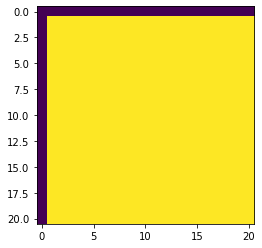

v1: (79, 79), v2: (100, 100)


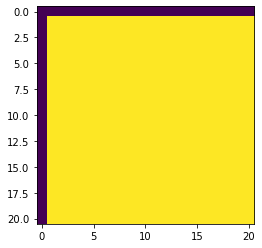

([((79, 299), (100, 320)), ((79, 79), (100, 100))], (200.0, 200.0))


In [5]:
img_path = 'resources/10.png'

(boxes, origin) = get_boxes(img_path)

In [148]:
quadrants = quadrants_for_boxes(boxes, origin)
quadrants

[2, 0]

In [170]:
quadrants = [0,1,2,3]
code = get_encoding(quadrants)
code

'1111'

In [176]:
num=0
num = num | 1 << 3 - 0 
format(num, "04b")

'1000'

In [177]:
num = num | 1 << 3 - 1 
format(num, "04b")

'1100'

In [178]:
num = num | 1 << 3 - 2 
format(num, "04b")

'1110'

In [180]:
num = num | 1 << 3 - 3
format(num, "04b")

'1111'